In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
import sys
sys.path.append(os.path.abspath('..'))
from ethan.numpy.net import *

In [2]:
def sin_data(n):
    X = np.linspace(-np.pi, np.pi, n)
    Y = np.sin(X)
    return X.reshape(-1, 1), Y.reshape(-1, 1)

def sin_shuffle(X, Y):
    idx = np.random.permutation(len(X))
    return X[idx], Y[idx]

def sin_sort(X, Y, _Y):
    idx = np.argsort(X, axis=0)
    return X[idx].reshape(-1), Y[idx].reshape(-1), _Y[idx].reshape(-1)

In [3]:
net_info = [
    {"module": Mlp, "param": {"in_features": 1, "out_features": 8}},
    {"module": Sigmoid},
    {"module": Mlp, "param": {"in_features": 8, "out_features": 4}},
    {"module": Sigmoid},
    {"module": Mlp, "param": {"in_features": 4, "out_features": 1}},
]

net = Net(net_info, 0)

100%|██████████| 200/200 [00:01<00:00, 149.76it/s, avg_loss=0.00782, loss=9.96e-5] 


Net(
  (0): Mlp(in_features=1, out_features=8)
  (1): Sigmoid()
  (2): Mlp(in_features=8, out_features=4)
  (3): Sigmoid()
  (4): Mlp(in_features=4, out_features=1)
)


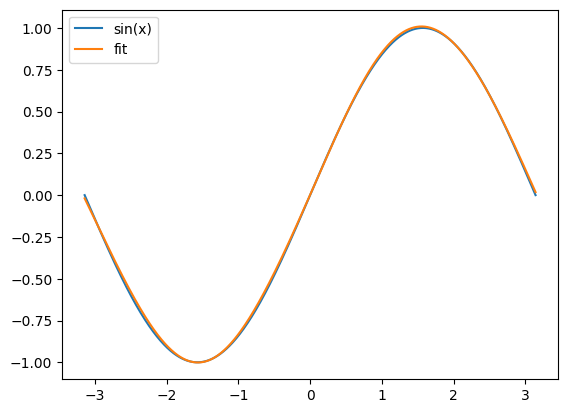

In [5]:
X, Y = sin_data(1000)

epochs = 200
pbar = tqdm(range(epochs))
for i in pbar:
    X, Y = sin_shuffle(X, Y)
    net.train(X, Y, Mse, 10, 1)

    _Y = net.pred(X)
    loss = Mse.forward(Y, _Y)
    avg_loss = np.mean(np.abs(_Y - Y))
    pbar.set_postfix(loss=loss, avg_loss=avg_loss)

print(net)
X, Y, _Y = sin_sort(X, Y, _Y)
plt.plot(X, Y, label="sin(x)")
plt.plot(X, _Y, label="fit")
plt.legend()
plt.show()